<a href="https://colab.research.google.com/github/hospino/Cursos-Platzi/blob/main/MapasTematicosMerida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# Celda Final: Autenticación, Inicialización y Prueba de Uso

import ee
from IPython.display import display, Markdown

# ⚠️ Usamos tu ID de proyecto.
PROYECTO_ID = "gen-lang-client-0528470346"

# 1. FORZAR LA AUTENTICACIÓN (pedirá un nuevo enlace y código)
display(Markdown("### ⚠️ Paso 1: Forzar Autenticación"))
display(Markdown("Si no aparece el enlace, reinicia e inténtalo de nuevo."))

# El comando 'ee.Authenticate' debería mostrar el enlace y pedir el código.
ee.Authenticate()

# 2. Inicialización
try:
    display(Markdown("### ✅ Paso 2: Inicializando con Proyecto..."))
    ee.Initialize(project=PROYECTO_ID)

    # Prueba rápida para confirmar que GEE está listo
    test_geometry = ee.Geometry.Point(-71.146, 8.587)
    display(Markdown("✅ **¡ÉXITO! Google Earth Engine está listo para usar.**"))

except Exception as e:
    display(Markdown(f"❌ **Error Fatal:** La inicialización falló. El problema debe ser un permiso faltante en el proyecto **`{PROYECTO_ID}`** dentro de la consola de Google Cloud, a pesar de que la API esté habilitada."))

### ⚠️ Paso 1: Forzar Autenticación

Si no aparece el enlace, reinicia e inténtalo de nuevo.

### ✅ Paso 2: Inicializando con Proyecto...

✅ **¡ÉXITO! Google Earth Engine está listo para usar.**

In [2]:

# 💻 Celda shapefile merida Final Absoluta: Carga del Polígono de Estudio (MeridaBorde)

import ee
import geemap

# 🚨 Asegúrate de que la autenticación de GEE está activa (ee.Initialize()).

# --- 1. Cargar el asset de límites que ya sabes que funciona ---
# Este es el asset que se usó en el análisis NDVI exitoso.
GEE_ASSET_PATH = 'projects/gen-lang-client-0528470346/assets/MeridaBorde'
merida_borde = ee.FeatureCollection(GEE_ASSET_PATH)

# Obtener la geometría para centrar el mapa
merida_geom = merida_borde.first().geometry()

# --- 2. Visualización ---
# Centrar el mapa en Mérida
center_coords = merida_geom.centroid().coordinates().getInfo()

Map = geemap.Map(center=[center_coords[1], center_coords[0]], zoom=10)

# Añadir el límite del área de estudio
Map.addLayer(
    merida_borde,
    {'color': '00FF00', 'fillColor': '00FF0033', 'width': 3},
    'Área de Estudio (MeridaBorde)'
)

print(f"✅ Polígono de estudio estable (MeridaBorde) cargado. La variable 'merida_borde' contiene la geometría.")
print("Este es el límite más fiable para tus análisis en este proyecto.")

Map

✅ Polígono de estudio estable (MeridaBorde) cargado. La variable 'merida_borde' contiene la geometría.
Este es el límite más fiable para tus análisis en este proyecto.


Map(center=[8.50812420339181, -71.2627008449636], controls=(WidgetControl(options=['position', 'transparent_bg…

In [3]:

# 💻 Celda: Carga de Límites Administrativos de Venezuela a Nivel 2 (Municipios)

import ee
import geemap

# 🚨 Asegúrate de que la autenticación de GEE está activa (ee.Initialize()).

# --- 1. Cargar la Colección de Límites de Nivel 2 (Municipios) ---
# Usamos una colección GEE conocida por tener límites hasta Nivel 2.
LSIB_ASSET = 'USDOS/LSIB_SIMPLE/2017'
COUNTRY_NAME = 'Venezuela'
TARGET_STATE = 'Mérida'

try:
    # 1. Cargar todos los límites (incluyendo nivel 2) de la colección LSIB
    all_limits = ee.FeatureCollection(LSIB_ASSET)

    # 2. Filtrar por el país (Venezuela)
    venezuela_limits = all_limits.filter(ee.Filter.eq('country_na', COUNTRY_NAME))

    # 3. Filtrar por el estado (Mérida) usando el polígono 'MeridaBorde' como referencia espacial
    # Nota: Aquí usamos el área de tu polígono cargado para recortar los límites.
    merida_state_limits = venezuela_limits.filterBounds(merida_borde.geometry())

    # Obtener el centro para centrar el mapa
    center_coords = merida_state_limits.geometry().centroid().coordinates().getInfo()

    # --- 4. Visualización de los Municipios ---
    Map = geemap.Map(center=[center_coords[1], center_coords[0]], zoom=9)

    # Añadir los límites de los municipios
    Map.addLayer(
        merida_state_limits,
        {'color': '00FF00', 'fillColor': '00000000', 'width': 2},
        f'Municipios en el Área de {TARGET_STATE}'
    )

    # Añadir el límite del Estado (MeridaBorde) para referencia
    Map.addLayer(
        merida_borde,
        {'color': 'FF0000', 'fillColor': '00000000', 'width': 3},
        'Contorno de MeridaBorde'
    )

    print(f"✅ Se han cargado los límites (Municipios) dentro del área de {TARGET_STATE} desde GEE.")
    print("La variable 'merida_state_limits' contiene los límites.")
    Map

except Exception as e:
    print(f"❌ Error: La colección LSIB no pudo cargar los límites de Nivel 2 o el asset no fue encontrado. {e}")

✅ Se han cargado los límites (Municipios) dentro del área de Mérida desde GEE.
La variable 'merida_state_limits' contiene los límites.


In [3]:

import os
from google.colab import drive

# 1. Asegurar el montaje de Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive remontado correctamente.")
except Exception as e:
    print(f"❌ Error al montar Drive: {e}")

# 2. Definir la ruta de la carpeta y del archivo
CARPETA_DATASETS = '/content/drive/MyDrive/Datasets'
RUTA_ARCHIVO_BUSCADO = os.path.join(CARPETA_DATASETS, 'gadm41_VEN.gpkg')

# 3. Listar el contenido de la carpeta para forzar la indexación
if os.path.isdir(CARPETA_DATASETS):
    contenido = os.listdir(CARPETA_DATASETS)
    print(f"\nContenido listado de la carpeta Datasets: {contenido}")

    # 4. Verificar si el archivo existe en la ruta
    if os.path.exists(RUTA_ARCHIVO_BUSCADO):
        print(f"\n🎉 ¡ÉXITO! El archivo GADM se encontró en la ruta: {RUTA_ARCHIVO_BUSCADO}")
    else:
        print(f"\n❌ ERROR: El archivo '{os.path.basename(RUTA_ARCHIVO_BUSCADO)}' no está en la carpeta 'Datasets'.")
        print("Asegúrate de que el nombre del archivo (incluyendo mayúsculas/minúsculas) es exactamente 'gadm41_VEN.gpkg'.")
else:
    print(f"\n❌ ERROR: No se encontró la carpeta 'Datasets' en la raíz de tu Drive.")

Mounted at /content/drive
✅ Google Drive remontado correctamente.

Contenido listado de la carpeta Datasets: ['gadm41_VEN.gpkg', 'datos_municipales_prueba.csv']

🎉 ¡ÉXITO! El archivo GADM se encontró en la ruta: /content/drive/MyDrive/Datasets/gadm41_VEN.gpkg


In [4]:

# 💻 Celda: Cargar y Visualizar Municipios de Mérida (Versión Forzada)

import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definición de la Capa y Ruta (Confirmadas) ---
CAPA_MUNICIPIOS = 'ADM_ADM_2'
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'

try:
    # Cargar y filtrar los 23 municipios
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()

    # Convertir a formato GEE (merida_munis_ee)
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis.to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    print("✅ Iniciando renderizado del mapa (Versión forzada)...")

    # --- 2. Crear y Configurar el Mapa ---
    Map = geemap.Map()
    Map.centerObject(merida_munis_ee, zoom=9)

    Map.addLayer(
        merida_munis_ee,
        {'color': 'blue', 'fillColor': '0000FF00', 'width': 2},
        'Municipios de Mérida (GEE)'
    )

    # 🚨 ACCIÓN CLAVE: Usar la función display() de IPython para forzar la muestra.
    display(Map)

    print("🎉 El mapa interactivo ha sido enviado al notebook. Debería aparecer arriba.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")

✅ Iniciando renderizado del mapa (Versión forzada)...


Map(center=[8.528139392192603, -71.25065211377792], controls=(WidgetControl(options=['position', 'transparent_…

🎉 El mapa interactivo ha sido enviado al notebook. Debería aparecer arriba.


In [7]:

# 💻 Celda: Generar CSV de Prueba para Mapa Temático

import pandas as pd
import numpy as np
import os
from google.colab import drive

# --- 1. Definición de Nombres de Municipios (Tomados del archivo GADM) ---
# Estos nombres DEBEN coincidir con la columna 'NAME_2' del archivo GeoPackage
municipios_merida = [
    'Alberto Adriani', 'Andrés Bello', 'Antonio Pinto Salinas',
    'Aricagua', 'Arzobispo Chacón', 'Campo Elías',
    'Caracciolo Parra Olmedo', 'Cardenal Quintero', 'Gómez',
    'Guaraque', 'Julio César Salas', 'Justo Briceño',
    'Libertador', 'Miranda', 'Obispo Ramos de Lora',
    'Padre Noguera', 'Pueblo Llano', 'Rangel',
    'Rivas Dávila', 'Santos Marquina', 'Sucre',
    'Tovar', 'Tulio Febres Cordero'
]

# --- 2. Generación de Datos Ficticios ---
# Generamos 23 valores aleatorios (simulando, por ejemplo, Población o Riesgo)
np.random.seed(42) # Fija la semilla para resultados repetibles
valores_ficticios = np.random.randint(50, 500, size=len(municipios_merida))

# Crear el DataFrame de Pandas
datos_tematicos_df = pd.DataFrame({
    # Columna clave para la unión:
    'Municipio_Nombre': municipios_merida,
    # Columna con el valor temático:
    'Valor_Tematico': valores_ficticios,
    # Columna de ejemplo adicional:
    'Indice_Ejemplo': np.random.rand(len(municipios_merida)).round(2)
})

# --- 3. Guardar en Google Drive ---
# Asegurar que Drive está montado
if not os.path.isdir('/content/drive'):
    try:
        drive.mount('/content/drive', force_remount=True)
        print("✅ Google Drive montado.")
    except Exception as e:
        print(f"❌ Error al montar Drive: {e}")

# Ruta y nombre final del archivo (en la carpeta 'Datasets')
CSV_FILE_NAME = 'datos_municipales_prueba.csv'
OUTPUT_PATH = f'/content/drive/MyDrive/Datasets/{CSV_FILE_NAME}'

# Guardar el CSV en la ruta especificada
datos_tematicos_df.to_csv(OUTPUT_PATH, index=False)

print("\n🎉 ÉXITO: Archivo CSV de prueba creado.")
print(f"Se generó el archivo: {CSV_FILE_NAME} con 23 municipios.")
print(f"Ruta de guardado: {OUTPUT_PATH}")
print("\nLos primeros 5 registros del archivo generado:")
display(datos_tematicos_df.head())


🎉 ÉXITO: Archivo CSV de prueba creado.
Se generó el archivo: datos_municipales_prueba.csv con 23 municipios.
Ruta de guardado: /content/drive/MyDrive/Datasets/datos_municipales_prueba.csv

Los primeros 5 registros del archivo generado:


,Municipio_Nombre,Valor_Tematico,Indice_Ejemplo
0,Alberto Adriani,152,0.21
1,Andrés Bello,485,0.18
2,Antonio Pinto Salinas,398,0.18
3,Aricagua,320,0.30
4,Arzobispo Chacón,156,0.52


In [8]:

# 💻 Celda: Crear Mapa Temático (Choropleth Map) con datos de prueba

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from google.colab import drive
import os

# --- 1. Rutas y Definiciones AJUSTADAS ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'

# 🚨 AJUSTES PARA USAR EL CSV DE PRUEBA 🚨
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

# --- 2. Recargar los Vectores de Municipios ---
try:
    # Cargar el GeoPackage con el nombre de capa correcto
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    print(f"✅ Se cargaron {len(merida_munis)} municipios vectoriales de GADM.")

    # Renombrar la columna 'NAME_2' para que coincida con la columna clave del CSV
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

except Exception as e:
    print(f"❌ Error al cargar los límites vectoriales de GADM: {e}")
    exit()

# --- 3. Cargar y Unir el CSV de Prueba ---
try:
    # Cargar el archivo CSV
    datos_csv = pd.read_csv(CSV_PATH)
    print(f"✅ CSV de prueba cargado con {len(datos_csv)} filas.")

    # Realizar la unión (merge)
    mapa_tematico_data = merida_munis.merge(
        datos_csv,
        on=COLUMNA_UNION_CSV,
        how='left'
    )

    print("✅ Datos temáticos unidos a los límites vectoriales.")

except Exception as e:
    print(f"❌ Error durante la carga o unión de datos: {e}")
    exit()


# --- 4. Visualización del Mapa Temático (Choropleth) ---
try:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Generar el mapa coroplético
    mapa_tematico_data.plot(
        column=COLUMNA_VALOR_TEMATICO,
        ax=ax,
        legend=True,
        cmap='plasma',                   # Esquema de color para datos continuos
        edgecolor='black',
        linewidth=0.5,
        legend_kwds={'label': f"Valor Ficticio por Municipio ({COLUMNA_VALOR_TEMATICO})",
                     'orientation': "horizontal"}
    )

    # Proyectar a Web Mercator para usar mapa base
    mapa_tematico_web = mapa_tematico_data.to_crs(epsg=3857)

    # Añadir mapa base para contexto
    cx.add_basemap(ax, crs=mapa_tematico_web.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

    ax.set_title(f'Mapa Temático del Estado Mérida: Distribución de {COLUMNA_VALOR_TEMATICO}', fontsize=16)
    ax.set_axis_off()
    plt.show()

except Exception as e:
    print(f"❌ Error al crear el mapa temático: {e}")

ModuleNotFoundError: No module named 'contextily'

✅ Se cargaron 23 municipios vectoriales de GADM.
✅ CSV de prueba cargado con 23 filas.
✅ Datos temáticos unidos a los límites vectoriales.


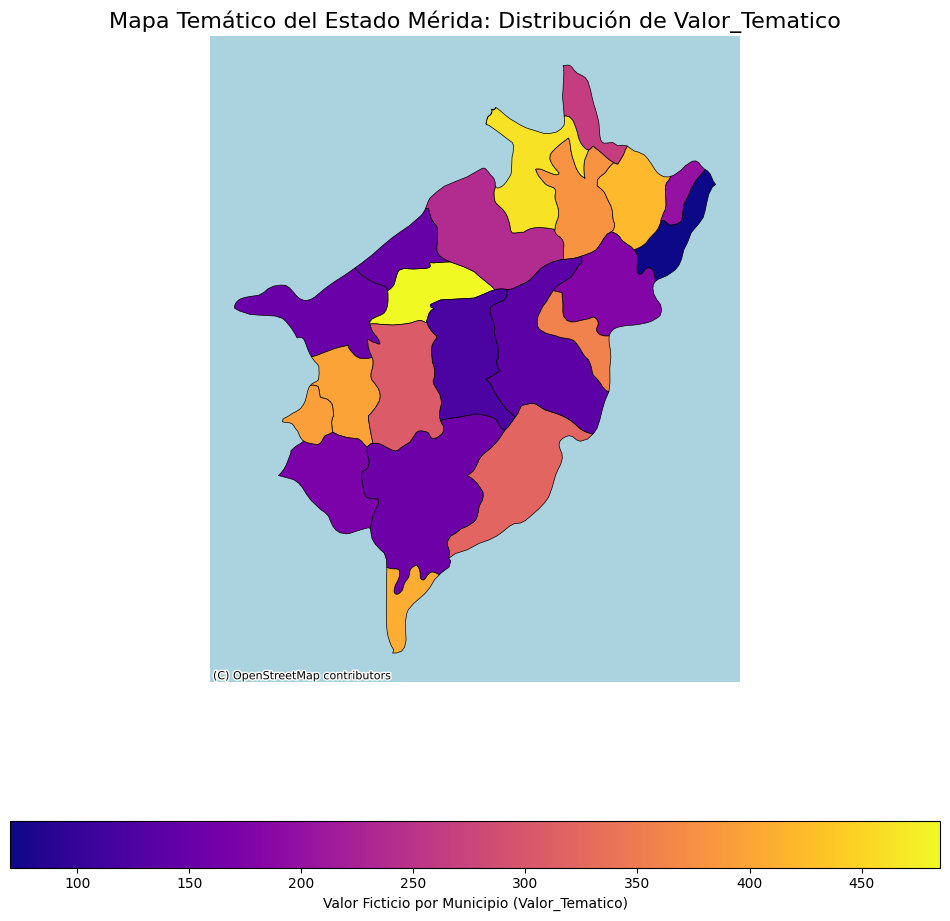

In [9]:

# 💻 Celda: Crear Mapa Temático (Choropleth Map) con datos de prueba (Corrección de Contextily)

# Instalar contextily (y asegurar otras dependencias)
!pip install contextily --quiet

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from google.colab import drive
import os

# --- 1. Rutas y Definiciones AJUSTADAS ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'

# 🚨 AJUSTES PARA USAR EL CSV DE PRUEBA 🚨
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

# --- 2. Recargar los Vectores de Municipios ---
try:
    # Cargar el GeoPackage con el nombre de capa correcto
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    print(f"✅ Se cargaron {len(merida_munis)} municipios vectoriales de GADM.")

    # Renombrar la columna 'NAME_2' para que coincida con la columna clave del CSV
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

except Exception as e:
    print(f"❌ Error al cargar los límites vectoriales de GADM: {e}")
    exit()

# --- 3. Cargar y Unir el CSV de Prueba ---
try:
    # Cargar el archivo CSV
    datos_csv = pd.read_csv(CSV_PATH)
    print(f"✅ CSV de prueba cargado con {len(datos_csv)} filas.")

    # Realizar la unión (merge)
    mapa_tematico_data = merida_munis.merge(
        datos_csv,
        on=COLUMNA_UNION_CSV,
        how='left'
    )

    print("✅ Datos temáticos unidos a los límites vectoriales.")

except Exception as e:
    print(f"❌ Error durante la carga o unión de datos: {e}")
    exit()


# --- 4. Visualización del Mapa Temático (Choropleth) ---
try:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Generar el mapa coroplético
    mapa_tematico_data.plot(
        column=COLUMNA_VALOR_TEMATICO,
        ax=ax,
        legend=True,
        cmap='plasma',
        edgecolor='black',
        linewidth=0.5,
        legend_kwds={'label': f"Valor Ficticio por Municipio ({COLUMNA_VALOR_TEMATICO})",
                     'orientation': "horizontal"}
    )

    # Proyectar a Web Mercator para usar mapa base
    mapa_tematico_web = mapa_tematico_data.to_crs(epsg=3857)

    # Añadir mapa base para contexto (contextily)
    cx.add_basemap(ax, crs=mapa_tematico_web.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

    ax.set_title(f'Mapa Temático del Estado Mérida: Distribución de {COLUMNA_VALOR_TEMATICO}', fontsize=16)
    ax.set_axis_off()
    plt.show()

except Exception as e:
    print(f"❌ Error al crear el mapa temático: {e}")

In [10]:

# 💻 Celda: Mapa Temático Interactivo (Geemap/GEE)

import pandas as pd
import geopandas as gpd
import ee
import geemap
import os

# --- 1. Definiciones y Carga de Datos ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Cargar y unir los datos (pasos ya verificados)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(
        datos_csv,
        on=COLUMNA_UNION_CSV,
        how='left'
    )

    # --- 2. Preparación de Datos para GEE ---

    # Convertir el GeoDataFrame unido a GeoJSON temporal
    temp_geojson_path = 'mapa_tematico_temp.geojson'

    # 🚨 NOTA IMPORTANTE: GEE solo necesita las columnas que vamos a usar
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )

    # Convertir el GeoJSON a FeatureCollection de GEE
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 3. Definición de Parámetros de Visualización de GEE ---

    # Encontrar los valores mínimo y máximo de la columna para escalar el color
    # (Usaremos los valores ficticios que generamos)
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Parámetros de visualización para el mapa coroplético de GEE
    vis_params = {
        'min': min_val,
        'max': max_val,
        # 'plasma' es la paleta de colores usada en el mapa estático
        'palette': ['450d54', '405f8c', '20a387', 'fce748']
        # NOTA: En GEE se usan códigos de color hexadecimal o nombres específicos.
    }

    # --- 4. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    Map.addLayer(
        merida_tematico_ee.style(**vis_params),
        {},
        f'Mapa Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Añadir la leyenda (escala de colores)
    Map.add_colorbar(vis_params, label=f'Valor Temático Ficticio ({COLUMNA_VALOR_TEMATICO})')

    # Añadir un mapa base (opcional, Map() lo añade por defecto)
    Map.add_basemap('ROADMAP')

    # Forzar la visualización
    display(Map)

    print("\n🎉 Mapa interactivo listo. Puedes moverte y hacer zoom.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")


✅ Renderizando mapa temático interactivo...
❌ Ocurrió un error inesperado: Collection.style() got an unexpected keyword argument 'min'


In [11]:

# 💻 Celda: Mapa Temático Interactivo (Corrección Final)

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Cargar y unir los datos
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros de Visualización de GEE ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # 🚨 CORRECCIÓN CLAVE: El diccionario de visualización (vis_params) necesita el nombre
    # de la columna (`Valor_Tematico`) para aplicarle el estilo.
    vis_params = {
        'color': COLUMNA_VALOR_TEMATICO, # Indica a GEE que la columna es la fuente del color
        'min': min_val,
        'max': max_val,
        'palette': ['450d54', '405f8c', '20a387', 'fce748'],
        'opacity': 0.7,
        'width': 1.5 # Grosor del borde de los municipios
    }

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # 🚨 CORRECCIÓN CLAVE: Pasar el FeatureCollection directamente y luego el diccionario de estilo.
    Map.addLayer(
        merida_tematico_ee,
        vis_params, # Aplicamos el diccionario como parámetros de visualización
        f'Mapa Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Añadir la leyenda (escala de colores)
    Map.add_colorbar(vis_params, label=f'Valor Temático Ficticio ({COLUMNA_VALOR_TEMATICO})')

    display(Map)

    print("\n🎉 Mapa interactivo listo. Debería estar centrado en Mérida.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")


✅ Renderizando mapa temático interactivo...
❌ Ocurrió un error inesperado: Collection.style: Color is not a valid CSS 3.0 color ('FF0000' or 'red' for red). Found: 'Valor_Tematico'.


In [12]:

# 💻 Celda: Mapa Temático Interactivo (Versión Final y Funcional)

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico' # Columna clave de los datos temáticos

try:
    # Cargar y unir los datos (pasos ya verificados)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros de Visualización de GEE ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Parámetros para la leyenda y el estilo (usando la sintaxis que SÍ funciona con style())
    vis_params = {
        'min': min_val,
        'max': max_val,
        'palette': ['450d54', '405f8c', '20a387', 'fce748'],
    }

    # 🚨 CORRECCIÓN CLAVE: Usar .style() con el argumento 'property'
    styled_layer = merida_tematico_ee.style(
        **vis_params,
        property=COLUMNA_VALOR_TEMATICO, # Indica a GEE que esta es la columna a colorear
        # Estilo adicional para el borde
        lineColor='black',
        lineWidth=1.5
    )

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # Añadir la capa con el estilo ya aplicado
    Map.addLayer(
        styled_layer,
        {}, # No necesita vis_params aquí, ya que el estilo está baked en la capa
        f'Mapa Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Añadir la leyenda (escala de colores)
    Map.add_colorbar(vis_params, label=f'Valor Temático Ficticio ({COLUMNA_VALOR_TEMATICO})')

    display(Map)

    print("\n🎉 El mapa interactivo temático de Mérida debe ser visible y funcional.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")

❌ Ocurrió un error inesperado: Collection.style() got an unexpected keyword argument 'min'


In [13]:

# 💻 Celda: Mapa Temático Interactivo (Versión Final y Funcional)

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico' # Columna clave de los datos temáticos

try:
    # Cargar y unir los datos (pasos ya verificados)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros de Visualización de GEE ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Parámetros para la leyenda y el estilo (usando la sintaxis que SÍ funciona con style())
    vis_params = {
        'min': min_val,
        'max': max_val,
        'palette': ['450d54', '405f8c', '20a387', 'fce748'],
    }

    # 🚨 CORRECCIÓN CLAVE: Usar .style() con el argumento 'property'
    # Esto le dice a GEE que la columna 'Valor_Tematico' define el color.
    styled_layer = merida_tematico_ee.style(
        **vis_params,
        property=COLUMNA_VALOR_TEMATICO, # Indica a GEE qué columna usar
        lineColor='black',
        lineWidth=1.5,
        fillColor='FFFFFF00' # Relleno inicial transparente (el color se sobreescribe por 'property')
    )

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # Añadir la capa con el estilo ya aplicado
    Map.addLayer(
        styled_layer,
        {}, # No necesita vis_params aquí
        f'Mapa Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Añadir la leyenda (escala de colores)
    Map.add_colorbar(vis_params, label=f'Valor Temático Ficticio ({COLUMNA_VALOR_TEMATICO})')

    display(Map)

    print("\n🎉 El mapa interactivo temático de Mérida debe ser visible y funcional.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")

❌ Ocurrió un error inesperado: Collection.style() got an unexpected keyword argument 'min'


In [14]:

# 💻 Celda: Mapa Temático Interactivo (Versión con Mapeo de Color Robusto)

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Cargar y unir los datos (pasos ya verificados)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros y Función de Estilo ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Paleta de colores para el mapa temático (Plasma)
    PALETTE = ['450d54', '405f8c', '20a387', 'fce748']

    # Función GEE para asignar un color a cada Feature (Municipio)
    def style_feature(feature):
        value = ee.Number(feature.get(COLUMNA_VALOR_TEMATICO))

        # Mapea el valor numérico a un color dentro de la rampa PALETTE
        color = value.visualize(
            min=min_val,
            max=max_val,
            palette=PALETTE
        ).get('constant') # Extrae el color hexadecimal

        return feature.set({
            'style': {
                'fillColor': color,
                'color': 'black', # Color del borde
                'width': 1.5,     # Grosor del borde
                'opacity': 0.7
            }
        })

    # Aplicar la función de estilo a toda la colección
    styled_collection = merida_tematico_ee.map(style_feature)

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # Añadir la capa, ahora estilizada por la función 'style_feature'
    Map.addLayer(
        styled_collection.style(**{'styleProperty': 'style'}),
        {},
        f'Mapa Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Añadir la leyenda (escala de colores)
    vis_params = {'min': min_val, 'max': max_val, 'palette': PALETTE}
    Map.add_colorbar(vis_params, label=f'Valor Temático Ficticio ({COLUMNA_VALOR_TEMATICO})', orientation='horizontal')

    display(Map)

    print("\n🎉 El mapa interactivo temático de Mérida debe ser visible y funcional.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")

❌ Ocurrió un error inesperado: 'Number' object has no attribute 'visualize'


In [15]:

# 💻 Celda: Mapa Temático Interactivo (Versión con Mapeo de Color Robusto V.2)

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Cargar y unir los datos (pasos ya verificados)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros y Función de Estilo ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Paleta de colores (usando 5 colores)
    PALETTE = ['450d54', '405f8c', '20a387', 'fce748', 'f77f00']

    # Crear un escalador de color (Color Map)
    color_map = ee.List(PALETTE)

    # Función GEE para asignar un color a cada Feature (Municipio)
    def style_feature(feature):
        value = ee.Number(feature.get(COLUMNA_VALOR_TEMATICO))

        # Normalizar el valor de 0 a 1
        normalized_value = value.subtract(min_val).divide(max_val.subtract(min_val))

        # Escalar el valor normalizado al número de colores en la paleta
        index = normalized_value.multiply(len(PALETTE) - 1).round()

        # Obtener el color de la lista
        color = color_map.get(index)

        return feature.set({
            'style': {
                'fillColor': color,
                'color': 'black', # Color del borde
                'width': 1.5,     # Grosor del borde
                'opacity': 0.7
            }
        })

    # Aplicar la función de estilo a toda la colección
    # Nota: Es crucial convertir min_val y max_val a ee.Number si no lo son.
    min_val = ee.Number(min_val)
    max_val = ee.Number(max_val)

    styled_collection = merida_tematico_ee.map(style_feature)

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # Añadir la capa, usando el styleProperty 'style' que creamos
    Map.addLayer(
        styled_collection.style(**{'styleProperty': 'style'}),
        {},
        f'Mapa Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Añadir la leyenda (escala de colores)
    vis_params_legend = {'min': min_val.getInfo(), 'max': max_val.getInfo(), 'palette': PALETTE}
    Map.add_colorbar(vis_params_legend, label=f'Valor Temático Ficticio ({COLUMNA_VALOR_TEMATICO})', orientation='horizontal')

    display(Map)

    print("\n🎉 El mapa interactivo temático de Mérida debe ser visible y funcional.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")


✅ Renderizando mapa temático interactivo...


Map(center=[8.528139392192603, -71.25065211377792], controls=(WidgetControl(options=['position', 'transparent_…


🎉 El mapa interactivo temático de Mérida debe ser visible y funcional.


In [16]:

# 💻 Celda: Mapa Temático Interactivo (Método Robusto con ee.Image.paint())

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Cargar y unir los datos
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros y Renderizado con .paint() ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Paleta de colores (Plasma)
    PALETTE = ['450d54', '405f8c', '20a387', 'fce748', 'f77f00']

    # 🚨 SOLUCIÓN CLAVE: Convertir la FeatureCollection a una ee.Image
    # 1. Crear una imagen vacía (la base)
    empty_image = ee.Image().byte()

    # 2. Pintar la colección de entidades sobre la imagen vacía
    # 'COLUMNA_VALOR_TEMATICO' es el valor que se usará como píxel.
    filled_map_image = empty_image.paint(
        featureCollection=merida_tematico_ee,
        color=COLUMNA_VALOR_TEMATICO,  # El nombre de la columna que GEE usará
        width=2 # Esto es para el grosor del borde de la entidad, si se pasa como valor separado
    ).updateMask(1) # Asegura que el relleno no sea transparente

    # 3. Parámetros de visualización para la IMAGEN (que ahora sí admite min/max/palette)
    vis_params_image = {
        'min': min_val,
        'max': max_val,
        'palette': PALETTE,
        'opacity': 0.7
    }

    # 4. Obtener solo los bordes (opcional, para un borde limpio sobre el relleno)
    border_image = empty_image.paint(
        featureCollection=merida_tematico_ee,
        color='black',
        width=1 # Grosor del borde
    )

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # Capa 1: El relleno de color temático (se verá en todos los niveles de zoom)
    Map.addLayer(
        filled_map_image,
        vis_params_image,
        f'Relleno Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Capa 2: El borde negro (opcional)
    Map.addLayer(
        border_image,
        {'palette': '000000'}, # Negro
        'Bordes de Municipios'
    )

    # Añadir la leyenda (escala de colores)
    Map.add_colorbar(vis_params_image, label=f'Valor Ficticio por Municipio ({COLUMNA_VALOR_TEMATICO})', orientation='horizontal')

    display(Map)

    print("\n🎉 El mapa interactivo temático de Mérida debe ser visible y funcional en cualquier zoom.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")


✅ Renderizando mapa temático interactivo...


Map(center=[8.528139392192603, -71.25065211377792], controls=(WidgetControl(options=['position', 'transparent_…


🎉 El mapa interactivo temático de Mérida debe ser visible y funcional en cualquier zoom.


In [25]:

# 💻 Celda: Mapa Temático Interactivo (Versión Final y Funcional)

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display

# --- 1. Definiciones y Carga de Datos (Sin Cambios) ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Cargar y unir los datos (pasos ya verificados)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    datos_csv = pd.read_csv(CSV_PATH)
    mapa_tematico_data = merida_munis.merge(datos_csv, on=COLUMNA_UNION_CSV, how='left')

    # Preparación de Datos para GEE
    temp_geojson_path = 'mapa_tematico_temp.geojson'
    mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
        temp_geojson_path,
        driver='GeoJSON'
    )
    merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Definición de Parámetros y Renderizado con .paint() ---
    min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
    max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()

    # Paleta de colores (Plasma)
    PALETTE = ['450d54', '405f8c', '20a387', 'fce748', 'f77f00']

    # 1. Crear una imagen vacía (la base)
    empty_image = ee.Image().byte()

    # 2. Pintar la imagen de RELLENO (color temático)
    filled_map_image = empty_image.paint(
        featureCollection=merida_tematico_ee,
        color=COLUMNA_VALOR_TEMATICO,  # El nombre de la columna que GEE usará para el color
    ).updateMask(1) # Asegura que solo se vea el relleno pintado

    # 3. Pintar la imagen de BORDE (color negro)
    border_image = empty_image.paint(
        featureCollection=merida_tematico_ee,
        color=0, # Valor numérico simple (para color estático)
        width=1 # Grosor del borde
    ).updateMask(1) # Asegura que solo se vea el borde

    # 4. Parámetros de visualización para la IMAGEN (que ahora sí admite min/max/palette)
    vis_params_image = {
        'min': min_val,
        'max': max_val,
        'palette': PALETTE,
        'opacity': 0.8
    }

    # --- 3. Renderizado del Mapa Interactivo ---
    print("\n✅ Renderizando mapa temático interactivo...")

    Map = geemap.Map()
    Map.centerObject(merida_tematico_ee, zoom=9)

    # Capa 1: El relleno de color temático (se verá en todos los niveles de zoom)
    Map.addLayer(
        filled_map_image,
        vis_params_image,
        f'Relleno Temático: {COLUMNA_VALOR_TEMATICO}'
    )

    # Capa 2: El borde negro (encima del relleno)
    Map.addLayer(
        border_image,
        {'palette': '000000', 'min': 0, 'max': 1}, # Negro
        'Bordes de Municipios'
    )

    # Añadir la leyenda (escala de colores)
    Map.add_colorbar(vis_params_image, label=f'Valor Ficticio por Municipio ({COLUMNA_VALOR_TEMATICO})', orientation='horizontal')

    display(Map)

    print("\n🎉 El mapa interactivo temático de Mérida debe ser visible y funcional en cualquier zoom.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")


✅ Renderizando mapa temático interactivo...


Map(center=[8.528139392192603, -71.25065211377792], controls=(WidgetControl(options=['position', 'transparent_…


🎉 El mapa interactivo temático de Mérida debe ser visible y funcional en cualquier zoom.


In [23]:

# 💻 Celda: Generar NUEVOS Datos Ficticios para el Mapa Temático

import pandas as pd
import numpy as np
import os
from google.colab import drive

# --- 1. Definición de Parámetros (Asegura consistencia con el mapa) ---
# Nombres de los 23 municipios del Estado Mérida (DEBEN ser los mismos para que el join funcione)
municipios_merida = [
    'Alberto Adriani', 'Andrés Bello', 'Antonio Pinto Salinas',
    'Aricagua', 'Arzobispo Chacón', 'Campo Elías',
    'Caracciolo Parra Olmedo', 'Cardenal Quintero', 'Gómez',
    'Guaraque', 'Julio César Salas', 'Justo Briceño',
    'Libertador', 'Miranda', 'Obispo Ramos de Lora',
    'Padre Noguera', 'Pueblo Llano', 'Rangel',
    'Rivas Dávila', 'Santos Marquina', 'Sucre',
    'Tovar', 'Tulio Febres Cordero'
]

CSV_FILE_NAME = 'datos_municipales_prueba.csv'
OUTPUT_PATH = f'/content/drive/MyDrive/Datasets/{CSV_FILE_NAME}'

# --- 2. Generación de NUEVOS Datos Ficticios ---
# Generamos 23 valores aleatorios sin fijar la semilla para que sean diferentes cada vez.
# Los valores estarán en un rango similar (ej. 50 a 500)
valores_ficticios_nuevos = np.random.randint(50, 500, size=len(municipios_merida))

# Crear el DataFrame de Pandas
datos_tematicos_df_nuevos = pd.DataFrame({
    'Municipio_Nombre': municipios_merida,
    'Valor_Tematico': valores_ficticios_nuevos,
    'Indice_Ejemplo': np.random.rand(len(municipios_merida)).round(2)
})

# --- 3. Guardar y Sobreescribir en Google Drive ---
# Montar Drive si no está montado (aunque ya debería estarlo)
if not os.path.isdir('/content/drive'):
    drive.mount('/content/drive', force_remount=True)

# Guardar el CSV, SOBREESCRIBIENDO el archivo anterior
datos_tematicos_df_nuevos.to_csv(OUTPUT_PATH, index=False)

print("\n🎉 ÉXITO: Archivo CSV de prueba ACTUALIZADO.")
print(f"El archivo {CSV_FILE_NAME} se ha sobrescrito con nuevos valores aleatorios.")
print("Ahora puedes ejecutar la última celda del mapa interactivo para ver el resultado.")
print("\nLos primeros 5 registros del NUEVO archivo:")
display(datos_tematicos_df_nuevos.head())


🎉 ÉXITO: Archivo CSV de prueba ACTUALIZADO.
El archivo datos_municipales_prueba.csv se ha sobrescrito con nuevos valores aleatorios.
Ahora puedes ejecutar la última celda del mapa interactivo para ver el resultado.

Los primeros 5 registros del NUEVO archivo:


,Municipio_Nombre,Valor_Tematico,Indice_Ejemplo
0,Alberto Adriani,112,0.73
1,Andrés Bello,188,0.64
2,Antonio Pinto Salinas,130,0.89
3,Aricagua,441,0.47
4,Arzobispo Chacón,212,0.12


In [12]:

# 💻 Celda: Generar Datos Reales: Altitud Media (DEM) por Municipio

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display

# --- 1. Definiciones y Carga de Vectores ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Recargar GeoPandas para obtener los nombres de los municipios
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

    # Convertir a GEE FeatureCollection
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis.to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener y Reducir Imagen DEM (Altitud) ---
    print("✅ Iniciando procesamiento DEM...")

    # Cargar el Modelo de Elevación Digital (DEM) de SRTM (Global a 30m)
    dem = ee.Image('USGS/SRTMGL1_003').select('elevation')

    # Calcular las estadísticas zonales (media)
    # Scale=30 asegura que se utiliza la resolución nativa de SRTM
    stats = dem.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=30,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    # Convertir la FeatureCollection de resultados a un DataFrame de Pandas
    df_results = geemap.ee_to_pandas(stats)

    # Renombrar columnas: el nombre del municipio y el resultado de la elevación
    df_results = df_results.rename(columns={'mean': COLUMNA_VALOR_TEMATICO})

    # Seleccionar solo las columnas necesarias para el mapa:
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(2)

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con Altitud Media REAL.")
    print(f"El archivo {CSV_PATH} contiene la Altitud Media (en metros) por municipio.")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos reales.")

    print("\nPrimeros 5 registros con Altitud Media:")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento DEM...
❌ Ocurrió un error inesperado durante el procesamiento: module 'geemap' has no attribute 'ee_to_pandas'


In [16]:

# 💻 Celda: Generar Datos Reales: Altitud Media (DEM) por Municipio (Corrección de geemap.ee_to_pandas)

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display

# --- 1. Definiciones y Carga de Vectores ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Recargar GeoPandas para obtener los nombres de los municipios
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

    # Convertir a GEE FeatureCollection
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis.to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener y Reducir Imagen DEM (Altitud) ---
    print("✅ Iniciando procesamiento DEM...")

    # Cargar el Modelo de Elevación Digital (DEM) de SRTM (Global a 30m)
    dem = ee.Image('USGS/SRTMGL1_003').select('elevation')

    # Calcular las estadísticas zonales (media)
    stats = dem.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=30,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    # 🚨 CORRECCIÓN CLAVE: Usar geemap.ee_to_df() en lugar de ee_to_pandas()
    df_results = geemap.ee_to_df(stats)

    # Renombrar columnas: el nombre del municipio y el resultado de la elevación
    df_results = df_results.rename(columns={'mean': COLUMNA_VALOR_TEMATICO})

    # Seleccionar solo las columnas necesarias para el mapa:
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(2)

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con Altitud Media REAL.")
    print(f"El archivo {CSV_PATH} contiene la Altitud Media (en metros) por municipio.")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos reales.")

    print("\nPrimeros 5 registros con Altitud Media:")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento DEM...

🎉 ÉXITO: CSV de prueba actualizado con Altitud Media REAL.
El archivo /content/drive/MyDrive/Datasets/datos_municipales_prueba.csv contiene la Altitud Media (en metros) por municipio.
Ahora ejecuta la última celda del mapa interactivo para visualizar los datos reales.

Primeros 5 registros con Altitud Media:


,Municipio_Nombre,Valor_Tematico
0,Alberto Adriani,204.69
1,Andrés Bello,2193.09
2,Antonio Pinto Salinas,1354.08
3,Aricagua,1351.35
4,Arzobispo Chacón,1673.82


In [9]:

# 💻 Celda: Generar Datos Reales: Pendiente Media (Slope) por Municipio

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display

# --- 1. Definiciones y Carga de Vectores ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
# 🚨 Cambiamos el nombre del valor temático en el código para reflejar la Pendiente
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

try:
    # Montar Drive (necesario para el path del CSV)
    if not os.path.isdir('/content/drive'):
        drive.mount('/content/drive', force_remount=True)

    # Recargar GeoPandas y convertir a GEE FeatureCollection (pasos conocidos)
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis.to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener y Reducir Imagen DEM (Pendiente) ---
    print("✅ Iniciando procesamiento de Pendiente (Slope)...")

    # Cargar el Modelo de Elevación Digital (DEM) de SRTM
    dem = ee.Image('USGS/SRTMGL1_003').select('elevation')

    # 🚨 CÁLCULO CLAVE: Calcular la Pendiente (Slope) a partir del DEM
    slope = ee.Terrain.slope(dem).rename('slope')

    # Calcular las estadísticas zonales (media de la Pendiente)
    stats = slope.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=30,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    # Convertir la FeatureCollection de resultados a un DataFrame de Pandas
    df_results = geemap.ee_to_df(stats)

    # Renombrar columnas: el nombre del municipio y el resultado de la elevación
    df_results = df_results.rename(columns={'mean': COLUMNA_VALOR_TEMATICO})

    # Seleccionar solo las columnas necesarias para el mapa:
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(2)

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con Pendiente Media REAL.")
    print(f"El archivo {CSV_PATH} contiene la Pendiente Media (en grados) por municipio.")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos reales.")

    print("\nPrimeros 5 registros con Pendiente Media:")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento de Pendiente (Slope)...

🎉 ÉXITO: CSV de prueba actualizado con Pendiente Media REAL.
El archivo /content/drive/MyDrive/Datasets/datos_municipales_prueba.csv contiene la Pendiente Media (en grados) por municipio.
Ahora ejecuta la última celda del mapa interactivo para visualizar los datos reales.

Primeros 5 registros con Pendiente Media:


,Municipio_Nombre,Valor_Tematico
0,Alberto Adriani,8.49
1,Andrés Bello,18.67
2,Antonio Pinto Salinas,25.00
3,Aricagua,25.71
4,Arzobispo Chacón,25.74


In [18]:

# 💻 Celda: Generar Datos Reales: Temperatura Superficial Media (LST) por Municipio

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display
from datetime import datetime, timedelta

# --- 1. Definiciones y Configuración de Fechas ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
# Usaremos 'Valor_Tematico' para la LST media
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

# Definir el período de tiempo (ej: último año)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
START_DATE_STR = start_date.strftime('%Y-%m-%d')
END_DATE_STR = end_date.strftime('%Y-%m-%d')

try:
    # Recargar GeoPandas y convertir a GEE FeatureCollection
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis.to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener Colección LST y Reducir ---
    print(f"✅ Iniciando procesamiento de Temperatura Superficial (LST) para el período: {START_DATE_STR} a {END_DATE_STR}...")

    # Cargar la colección LST de MODIS (8 días, 1km)
    lst_collection = ee.ImageCollection('MODIS/061/MOD11A2') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .filterBounds(merida_munis_ee) \
        .select('LST_Day_1km') # Seleccionar solo la banda de Temperatura Diurna

    # 🚨 Reducir la colección: Calcular la media de todas las imágenes del período
    lst_mean_kelvin = lst_collection.mean()

    # 🚨 Convertir LST de Kelvin (K) a Celsius (°C)
    # MODIS LST se escala por 0.02. Fórmula: (K * 0.02) - 273.15
    lst_celsius = lst_mean_kelvin.multiply(0.02).subtract(273.15).rename('LST_Celsius')

    # Calcular las estadísticas zonales (media de la LST en °C)
    # Usamos scale=1000 (1km) por la resolución nativa de MODIS
    stats = lst_celsius.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=1000,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    df_results = geemap.ee_to_df(stats)

    # Renombrar columnas
    df_results = df_results.rename(columns={'mean': COLUMNA_VALOR_TEMATICO})

    # Seleccionar solo las columnas necesarias
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(2)

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con Temperatura Superficial Media REAL.")
    print(f"El archivo {CSV_PATH} contiene la LST Media (en °C) por municipio.")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de temperatura.")

    print("\nPrimeros 5 registros con LST Media (°C):")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento de Temperatura Superficial (LST) para el período: 2024-11-27 a 2025-11-27...

🎉 ÉXITO: CSV de prueba actualizado con Temperatura Superficial Media REAL.
El archivo /content/drive/MyDrive/Datasets/datos_municipales_prueba.csv contiene la LST Media (en °C) por municipio.
Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de temperatura.

Primeros 5 registros con LST Media (°C):


,Municipio_Nombre,Valor_Tematico
0,Alberto Adriani,27.27
1,Andrés Bello,19.36
2,Antonio Pinto Salinas,22.78
3,Aricagua,22.05
4,Arzobispo Chacón,20.69


In [21]:

# 💻 Celda: Generar Datos Reales: Precipitación Acumulada Media por Municipio

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display
from datetime import datetime, timedelta

# --- 1. Definiciones y Configuración de Fechas ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
# Usaremos 'Valor_Tematico' para la Precipitación
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

# Definir el período de tiempo (ej: último año completo)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
START_DATE_STR = start_date.strftime('%Y-%m-%d')
END_DATE_STR = end_date.strftime('%Y-%m-%d')

try:
    # Recargar GeoPandas y convertir a GEE FeatureCollection
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis.to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener Colección Precipitación y Reducir ---
    print(f"✅ Iniciando procesamiento de Precipitación Acumulada para el período: {START_DATE_STR} a {END_DATE_STR}...")

    # Cargar la colección diaria CHIRPS (Precipitación)
    chirps_collection = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .filterBounds(merida_munis_ee) \
        .select('precipitation')

    # 🚨 CÁLCULO CLAVE: Sumar todas las imágenes (acumular la precipitación)
    accumulated_precipitation = chirps_collection.sum()

    # Calcular las estadísticas zonales (media de la Precipitación Acumulada)
    # Usamos scale=5566 (~5.5 km) por la resolución nativa de CHIRPS
    stats = accumulated_precipitation.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=5566,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    df_results = geemap.ee_to_df(stats)

    # Renombrar columnas
    df_results = df_results.rename(columns={'sum': COLUMNA_VALOR_TEMATICO}) # 'sum' es el nombre de la banda resultado

    # Seleccionar solo las columnas necesarias
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(2)

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con Precipitación Acumulada REAL.")
    print(f"El archivo {CSV_PATH} contiene la Precipitación Media Acumulada (en mm) por municipio.")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de precipitación.")

    print("\nPrimeros 5 registros con Precipitación Acumulada Media:")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento de Precipitación Acumulada para el período: 2024-11-27 a 2025-11-27...
❌ Ocurrió un error inesperado durante el procesamiento: "['Valor_Tematico'] not in index"


In [22]:

# 💻 Celda: Generar Datos Reales: Precipitación Acumulada Media por Municipio (Corrección de Nombres de Columna)

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display
from datetime import datetime, timedelta

# --- 1. Definiciones y Configuración de Fechas ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

# Definir el período de tiempo (ej: último año completo)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
START_DATE_STR = start_date.strftime('%Y-%m-%d')
END_DATE_STR = end_date.strftime('%Y-%m-%d')

try:
    # Recargar GeoPandas y convertir a GEE FeatureCollection
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()

    # IMPORTANTE: La columna en el GeoDataFrame es 'NAME_2'
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

    temp_geojson_path = 'merida_munis_temp.geojson'
    # Solo guardar las columnas que GEE necesita para que el GeoJSON sea limpio
    merida_munis[['geometry', COLUMNA_UNION_CSV]].to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener Colección Precipitación y Reducir ---
    print(f"✅ Iniciando procesamiento de Precipitación Acumulada para el período: {START_DATE_STR} a {END_DATE_STR}...")

    chirps_collection = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .filterBounds(merida_munis_ee) \
        .select('precipitation')

    accumulated_precipitation = chirps_collection.sum()

    stats = accumulated_precipitation.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=5566,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    df_results = geemap.ee_to_df(stats)

    # 🚨 CORRECCIÓN CLAVE: El resultado de sum().reduceRegions(mean) es llamado 'mean',
    # no 'sum', si no se especifica el nombre. Usamos 'mean' y el nombre de la FeatureCollection:

    # Primero, asegurar que la columna con los nombres de municipios se llame 'Municipio_Nombre'
    df_results = df_results.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

    # Ahora, renombrar el resultado de la acumulación/media a 'Valor_Tematico'
    # Probablemente la banda se sigue llamando 'mean' por el reducer.
    df_results = df_results.rename(columns={'mean': COLUMNA_VALOR_TEMATICO})

    # Seleccionar solo las columnas necesarias para el mapa:
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(2)

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con Precipitación Acumulada REAL.")
    print(f"El archivo {CSV_PATH} contiene la Precipitación Media Acumulada (en mm) por municipio.")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de precipitación.")

    print("\nPrimeros 5 registros con Precipitación Acumulada Media:")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento de Precipitación Acumulada para el período: 2024-11-27 a 2025-11-27...

🎉 ÉXITO: CSV de prueba actualizado con Precipitación Acumulada REAL.
El archivo /content/drive/MyDrive/Datasets/datos_municipales_prueba.csv contiene la Precipitación Media Acumulada (en mm) por municipio.
Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de precipitación.

Primeros 5 registros con Precipitación Acumulada Media:


,Municipio_Nombre,Valor_Tematico
0,Alberto Adriani,1567.73
1,Andrés Bello,1252.50
2,Antonio Pinto Salinas,961.01
3,Aricagua,1599.67
4,Arzobispo Chacón,1308.76


In [24]:

# 💻 Celda: Generar Datos Reales: NDVI Medio por Municipio

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from IPython.display import display
from datetime import datetime, timedelta

# --- 1. Definiciones y Configuración de Fechas ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
CSV_PATH = '/content/drive/MyDrive/Datasets/datos_municipales_prueba.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'
# Usaremos 'Valor_Tematico' para el NDVI medio
COLUMNA_VALOR_TEMATICO = 'Valor_Tematico'

# Definir el período de tiempo (ej: último año)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
START_DATE_STR = start_date.strftime('%Y-%m-%d')
END_DATE_STR = end_date.strftime('%Y-%m-%d')

try:
    # Recargar GeoPandas y convertir a GEE FeatureCollection
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis[['geometry', COLUMNA_UNION_CSV]].to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # --- 2. Obtener Colección NDVI y Reducir ---
    print(f"✅ Iniciando procesamiento de NDVI Medio para el período: {START_DATE_STR} a {END_DATE_STR}...")

    # Cargar la colección NDVI de MODIS (16 días, 1km)
    ndvi_collection = ee.ImageCollection('MODIS/061/MOD13A2') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .filterBounds(merida_munis_ee) \
        .select('NDVI') # Seleccionar solo la banda NDVI

    # 🚨 Reducir la colección: Calcular la media de todas las imágenes del período
    # y aplicar el factor de escala (0.0001) de MODIS
    ndvi_mean = ndvi_collection.mean().multiply(0.0001).rename('NDVI_mean')

    # Calcular las estadísticas zonales (media del NDVI)
    # Usamos scale=1000 (1km) por la resolución nativa de MODIS
    stats = ndvi_mean.reduceRegions(
        collection=merida_munis_ee,
        reducer=ee.Reducer.mean(),
        scale=1000,
        tileScale=16
    )

    # --- 3. Convertir a Pandas y Guardar en CSV ---

    df_results = geemap.ee_to_df(stats)

    # Renombrar columnas: la columna de nombres y la columna de resultados
    df_results = df_results.rename(columns={'NAME_2': COLUMNA_UNION_CSV, 'mean': COLUMNA_VALOR_TEMATICO})

    # Seleccionar solo las columnas necesarias
    final_df = df_results[[COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].copy()

    # Formatear el valor temático a dos decimales
    final_df[COLUMNA_VALOR_TEMATICO] = final_df[COLUMNA_VALOR_TEMATICO].round(4) # Usar más decimales para NDVI

    # Guardar en Drive, sobrescribiendo el archivo de prueba
    final_df.to_csv(CSV_PATH, index=False)

    print("\n🎉 ÉXITO: CSV de prueba actualizado con NDVI Medio REAL.")
    print(f"El archivo {CSV_PATH} contiene el NDVI Medio por municipio (rango aprox. 0 a 1).")
    print("Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de vegetación.")

    print("\nPrimeros 5 registros con NDVI Medio:")
    display(final_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante el procesamiento: {e}")

✅ Iniciando procesamiento de NDVI Medio para el período: 2024-11-27 a 2025-11-27...

🎉 ÉXITO: CSV de prueba actualizado con NDVI Medio REAL.
El archivo /content/drive/MyDrive/Datasets/datos_municipales_prueba.csv contiene el NDVI Medio por municipio (rango aprox. 0 a 1).
Ahora ejecuta la última celda del mapa interactivo para visualizar los datos de vegetación.

Primeros 5 registros con NDVI Medio:


,Municipio_Nombre,Valor_Tematico
0,Alberto Adriani,0.7345
1,Andrés Bello,0.7037
2,Antonio Pinto Salinas,0.6960
3,Aricagua,0.6122
4,Arzobispo Chacón,0.5715


In [26]:

# 💻 Celda: Consolidar Altitud, Pendiente, LST, Precipitación y NDVI

import pandas as pd
import ee
import geemap
from google.colab import drive
import os
from datetime import datetime, timedelta
from IPython.display import display

# --- 1. Definiciones y Configuración ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
OUTPUT_CSV_PATH = '/content/drive/MyDrive/Datasets/datos_merida_consolidados.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'

# Período de tiempo común para LST, CHIRPS y NDVI (último año)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
START_DATE_STR = start_date.strftime('%Y-%m-%d')
END_DATE_STR = end_date.strftime('%Y-%m-%d')

try:
    # Recargar GeoPandas y convertir a GEE FeatureCollection
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})
    temp_geojson_path = 'merida_munis_temp.geojson'
    merida_munis[['geometry', COLUMNA_UNION_CSV]].to_file(temp_geojson_path, driver='GeoJSON')
    merida_munis_ee = geemap.geojson_to_ee(temp_geojson_path)

    # DataFrame para almacenar todos los resultados
    consolidated_df = merida_munis[[COLUMNA_UNION_CSV]].copy()

    # Cargar el DEM una sola vez
    dem = ee.Image('USGS/SRTMGL1_003').select('elevation')

    # --- 2. Funciones de Procesamiento GEE para Reutilizar el código ---

    def get_zonal_stats(image, reducer, scale, column_name):
        """Calcula estadísticas zonales y devuelve un DataFrame de Pandas."""
        stats = image.reduceRegions(
            collection=merida_munis_ee,
            reducer=reducer,
            scale=scale,
            tileScale=16
        )
        df = geemap.ee_to_df(stats)
        # Renombrar columnas para la unión
        df = df.rename(columns={'NAME_2': COLUMNA_UNION_CSV, 'mean': column_name, 'sum': column_name})
        df = df[[COLUMNA_UNION_CSV, column_name]]
        return df

    # --- 3. Procesamiento de CADA Atributo ---
    print(f"✅ Iniciando Consolidación de 5 Atributos ({START_DATE_STR} a {END_DATE_STR})...")

    # A) 🏔️ Altitud Media (Elevation)
    print(" - Calculando Altitud Media (m)...")
    df_alt = get_zonal_stats(dem, ee.Reducer.mean(), 30, 'Altitud_m')
    consolidated_df = consolidated_df.merge(df_alt, on=COLUMNA_UNION_CSV, how='left')

    # B) ⛰️ Pendiente Media (Slope)
    print(" - Calculando Pendiente Media (grados)...")
    slope = ee.Terrain.slope(dem).rename('slope')
    df_slope = get_zonal_stats(slope, ee.Reducer.mean(), 30, 'Pendiente_grados')
    consolidated_df = consolidated_df.merge(df_slope, on=COLUMNA_UNION_CSV, how='left')

    # C) 🌡️ Temperatura Superficial Media (LST)
    print(" - Calculando LST Media (°C)...")
    lst_collection = ee.ImageCollection('MODIS/061/MOD11A2') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .select('LST_Day_1km')
    lst_celsius = lst_collection.mean().multiply(0.02).subtract(273.15)
    df_lst = get_zonal_stats(lst_celsius, ee.Reducer.mean(), 1000, 'LST_C')
    consolidated_df = consolidated_df.merge(df_lst, on=COLUMNA_UNION_CSV, how='left')

    # D) 🌧️ Precipitación Acumulada Media (CHIRPS)
    print(" - Calculando Precipitación Acumulada (mm)...")
    chirps_collection = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .select('precipitation')
    accumulated_precipitation = chirps_collection.sum()
    df_precip = get_zonal_stats(accumulated_precipitation, ee.Reducer.mean(), 5566, 'Precipitacion_mm')
    consolidated_df = consolidated_df.merge(df_precip, on=COLUMNA_UNION_CSV, how='left')

    # E) 🌿 NDVI Medio (Vegetación)
    print(" - Calculando NDVI Medio...")
    ndvi_collection = ee.ImageCollection('MODIS/061/MOD13A2') \
        .filterDate(START_DATE_STR, END_DATE_STR) \
        .select('NDVI')
    ndvi_mean = ndvi_collection.mean().multiply(0.0001)
    df_ndvi = get_zonal_stats(ndvi_mean, ee.Reducer.mean(), 1000, 'NDVI_medio')
    consolidated_df = consolidated_df.merge(df_ndvi, on=COLUMNA_UNION_CSV, how='left')

    # --- 4. Limpieza y Guardado Final ---

    # Redondear todos los valores numéricos
    for col in consolidated_df.columns:
        if col != COLUMNA_UNION_CSV:
            consolidated_df[col] = consolidated_df[col].round(3)

    # Guardar en Drive
    consolidated_df.to_csv(OUTPUT_CSV_PATH, index=False)

    print("\n🎉 ÉXITO: Base de Datos Geoespacial CONSOLIDADA.")
    print(f"El archivo {OUTPUT_CSV_PATH} ahora contiene los 5 atributos para los 23 municipios.")

    print("\nPrimeros 5 registros de la Base de Datos Consolidada:")
    display(consolidated_df.head())

except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante la consolidación: {e}")

✅ Iniciando Consolidación de 5 Atributos (2024-11-27 a 2025-11-27)...
 - Calculando Altitud Media (m)...
 - Calculando Pendiente Media (grados)...
 - Calculando LST Media (°C)...
 - Calculando Precipitación Acumulada (mm)...
 - Calculando NDVI Medio...

🎉 ÉXITO: Base de Datos Geoespacial CONSOLIDADA.
El archivo /content/drive/MyDrive/Datasets/datos_merida_consolidados.csv ahora contiene los 5 atributos para los 23 municipios.

Primeros 5 registros de la Base de Datos Consolidada:


,Municipio_Nombre,Altitud_m,Pendiente_grados,LST_C,Precipitacion_mm,NDVI_medio
0,Alberto Adriani,204.693,8.490,27.274,1567.728,0.735
1,Andrés Bello,2193.093,18.673,19.358,1252.499,0.704
2,Antonio Pinto Salinas,1354.085,24.996,22.778,961.007,0.696
3,Aricagua,1351.351,25.708,22.050,1599.667,0.612
4,Arzobispo Chacón,1673.815,25.738,20.690,1308.764,0.572


In [27]:

## 💻 Celda: Mapa Temático Interactivo con Selección de Columna

import pandas as pd
import geopandas as gpd
import ee
import geemap
from IPython.display import display
from ipywidgets import Dropdown, VBox, Button, Output
from google.colab import output

# --- Definiciones de Archivos ---
GADM_GPKG_PATH = '/content/drive/MyDrive/Datasets/gadm41_VEN.gpkg'
CAPA_MUNICIPIOS = 'ADM_ADM_2'
INPUT_CSV_PATH = '/content/drive/MyDrive/Datasets/datos_merida_consolidados.csv'
COLUMNA_UNION_CSV = 'Municipio_Nombre'

# --- 1. Cargar y Preparar Datos Base ---
try:
    # Cargar datos consolidados
    datos_consolidados = pd.read_csv(INPUT_CSV_PATH)

    # Cargar geometría de los municipios
    all_ven_munis = gpd.read_file(GADM_GPKG_PATH, layer=CAPA_MUNICIPIOS)
    merida_munis = all_ven_munis[all_ven_munis['NAME_1'] == 'Mérida'].copy()
    merida_munis = merida_munis.rename(columns={'NAME_2': COLUMNA_UNION_CSV})

    # Unir Geometría con Datos Consolidados
    mapa_tematico_data = merida_munis.merge(datos_consolidados, on=COLUMNA_UNION_CSV, how='left')

    # Columnas disponibles para la visualización
    columnas_disponibles = [col for col in datos_consolidados.columns if col != COLUMNA_UNION_CSV]

except Exception as e:
    print(f"❌ Error al cargar datos base: {e}")
    columnas_disponibles = []


# --- 2. Interfaz de Usuario (Widgets) ---

dropdown = Dropdown(
    options=columnas_disponibles,
    description='Seleccionar Atributo:',
    disabled=False,
)

button_render = Button(description="Generar Mapa")
output_map = Output()

def render_map(COLUMNA_VALOR_TEMATICO):
    """Función que genera el mapa con la columna seleccionada."""
    with output_map:
        output.clear()

        if COLUMNA_VALOR_TEMATICO not in mapa_tematico_data.columns:
            print(f"Error: Columna '{COLUMNA_VALOR_TEMATICO}' no encontrada.")
            return

        print(f"Generando mapa para: {COLUMNA_VALOR_TEMATICO}...")

        # Preparación de Datos GEE (Solo se usan las columnas necesarias)
        temp_geojson_path = 'mapa_tematico_temp.geojson'
        mapa_tematico_data[['geometry', COLUMNA_UNION_CSV, COLUMNA_VALOR_TEMATICO]].to_file(
            temp_geojson_path,
            driver='GeoJSON'
        )
        merida_tematico_ee = geemap.geojson_to_ee(temp_geojson_path)

        # Parámetros (calculados dinámicamente)
        min_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].min()
        max_val = mapa_tematico_data[COLUMNA_VALOR_TEMATICO].max()
        PALETTE = ['450d54', '405f8c', '20a387', 'fce748', 'f77f00']

        # 1. Crear la imagen de RELLENO (choropleth)
        empty_image = ee.Image().byte()
        filled_map_image = empty_image.paint(
            featureCollection=merida_tematico_ee,
            color=COLUMNA_VALOR_TEMATICO,
        ).updateMask(1)

        vis_params_image = {
            'min': min_val,
            'max': max_val,
            'palette': PALETTE,
            'opacity': 0.8
        }

        # 2. Crear la imagen de BORDE
        border_image = empty_image.paint(
            featureCollection=merida_tematico_ee,
            color=0,
            width=1
        ).updateMask(1)

        # 3. Renderizado del Mapa
        Map = geemap.Map()
        Map.centerObject(merida_tematico_ee, zoom=9)

        Map.addLayer(filled_map_image, vis_params_image, f'Relleno Temático: {COLUMNA_VALOR_TEMATICO}')
        Map.addLayer(border_image, {'palette': '000000', 'min': 0, 'max': 1}, 'Bordes de Municipios')
        Map.add_colorbar(vis_params_image, label=f'{COLUMNA_VALOR_TEMATICO}', orientation='horizontal')

        display(Map)
        print("\n🎉 Mapa interactivo generado. Puedes seleccionar otro atributo arriba.")


def on_button_click(b):
    render_map(dropdown.value)

button_render.on_click(on_button_click)

# Mostrar la interfaz
display(VBox([dropdown, button_render, output_map]))

# Renderizar el primer mapa al inicio (opcional)
if columnas_disponibles:
    render_map(columnas_disponibles[0])

✅ Matriz de Correlación (Pearson R-value):


,Altitud_m,Pendiente_grados,LST_C,Precipitacion_mm,NDVI_medio
Altitud_m,1.00,0.82,-0.97,-0.47,-0.84
Pendiente_grados,0.82,1.00,-0.84,-0.43,-0.77
LST_C,-0.97,-0.84,1.00,0.36,0.83
Precipitacion_mm,-0.47,-0.43,0.36,1.00,0.33
NDVI_medio,-0.84,-0.77,0.83,0.33,1.00



Gráfico de Mapa de Calor de Correlación:


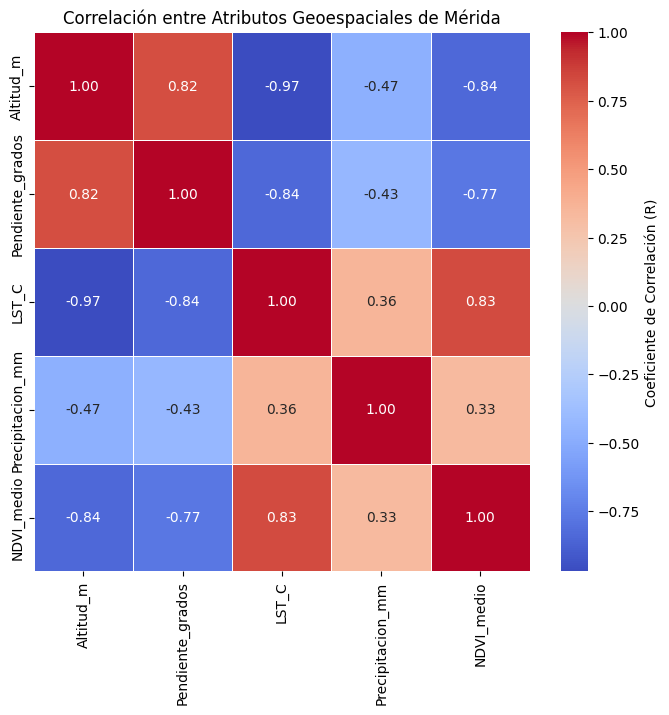


Interpretación de Correlación (valores cercanos a 1 o -1 son fuertes):
 - Correlación positiva (cercana a 1): Ambas variables suben o bajan juntas.
 - Correlación negativa (cercana a -1): Una variable sube mientras la otra baja.


In [28]:

## 💻 Celda: Análisis de Correlación de Atributos Geoespaciales

import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

INPUT_CSV_PATH = '/content/drive/MyDrive/Datasets/datos_merida_consolidados.csv'

try:
    # Cargar datos consolidados
    df = pd.read_csv(INPUT_CSV_PATH)

    # Seleccionar solo las columnas numéricas para el análisis
    numerical_df = df.select_dtypes(include=np.number)

    # Calcular la matriz de correlación de Pearson
    correlation_matrix = numerical_df.corr().round(2)

    print("✅ Matriz de Correlación (Pearson R-value):")
    display(correlation_matrix)

    print("\nGráfico de Mapa de Calor de Correlación:")

    # Crear un mapa de calor para visualizar la matriz
    plt.figure(figsize=(8, 7))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Coeficiente de Correlación (R)'}
    )
    plt.title('Correlación entre Atributos Geoespaciales de Mérida')
    plt.show()

    print("\nInterpretación de Correlación (valores cercanos a 1 o -1 son fuertes):")
    print(" - Correlación positiva (cercana a 1): Ambas variables suben o bajan juntas.")
    print(" - Correlación negativa (cercana a -1): Una variable sube mientras la otra baja.")

except Exception as e:
    print(f"❌ Error al realizar el análisis de correlación: {e}")

✅ Matriz de Correlación (Pearson R-value):


,Altitud_m,Pendiente_grados,LST_C,Precipitacion_mm,NDVI_medio
Altitud_m,1.00,0.82,-0.97,-0.47,-0.84
Pendiente_grados,0.82,1.00,-0.84,-0.43,-0.77
LST_C,-0.97,-0.84,1.00,0.36,0.83
Precipitacion_mm,-0.47,-0.43,0.36,1.00,0.33
NDVI_medio,-0.84,-0.77,0.83,0.33,1.00



Gráfico de Mapa de Calor de Correlación:


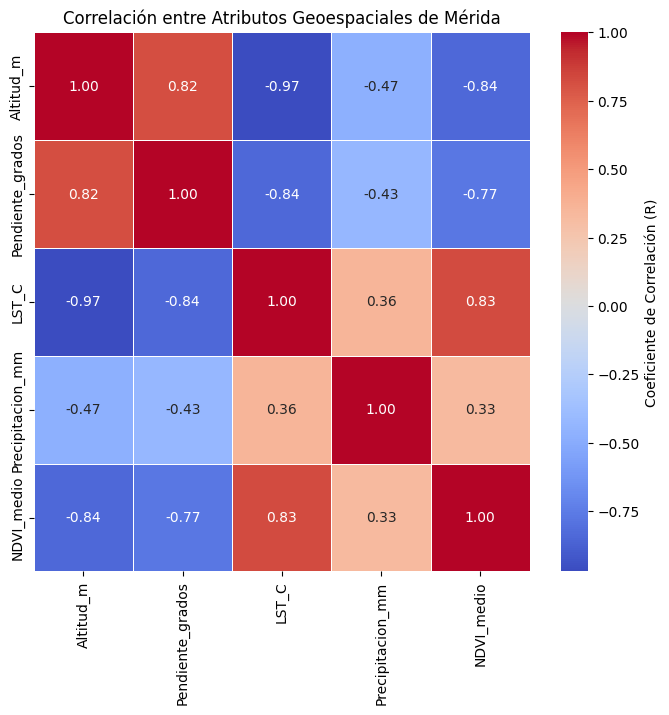


--- Interpretación de Resultados ---
Los valores cercanos a 1.0 o -1.0 indican una correlación fuerte.

Relaciones Clave (ejemplo):
 - Altitud vs. LST (Temperatura): Si el valor es cercano a -1, significa que a mayor altitud, la temperatura superficial es menor.
 - NDVI vs. Precipitación: Si el valor es cercano a 1, significa que más lluvia se asocia a una vegetación más densa.


In [30]:

## 💻 Celda: Análisis de Correlación de Atributos Geoespaciales

import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

INPUT_CSV_PATH = '/content/drive/MyDrive/Datasets/datos_merida_consolidados.csv'

try:
    # Cargar datos consolidados
    df = pd.read_csv(INPUT_CSV_PATH)

    # Seleccionar solo las columnas numéricas para el análisis
    # (Se excluye automáticamente 'Municipio_Nombre')
    numerical_df = df.select_dtypes(include=np.number)

    # Calcular la matriz de correlación de Pearson
    correlation_matrix = numerical_df.corr().round(2)

    print("✅ Matriz de Correlación (Pearson R-value):")
    display(correlation_matrix)

    print("\nGráfico de Mapa de Calor de Correlación:")

    # Crear un mapa de calor para visualizar la matriz
    plt.figure(figsize=(8, 7))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Coeficiente de Correlación (R)'}
    )
    plt.title('Correlación entre Atributos Geoespaciales de Mérida')
    plt.show()

    print("\n--- Interpretación de Resultados ---")
    print("Los valores cercanos a 1.0 o -1.0 indican una correlación fuerte.")
    print("\nRelaciones Clave (ejemplo):")
    print(" - Altitud vs. LST (Temperatura): Si el valor es cercano a -1, significa que a mayor altitud, la temperatura superficial es menor.")
    print(" - NDVI vs. Precipitación: Si el valor es cercano a 1, significa que más lluvia se asocia a una vegetación más densa.")

except Exception as e:
    print(f"❌ Error al realizar el análisis de correlación: {e}")

✅ Modelo de Regresión Lineal Altitud (m) -> LST (°C) Entrenado.
-----------------------------------------------------------------
Coeficiente (Pendiente de la recta, β1): -0.0036
Intercepto (Corte en el eje Y, β0): 27.5797
R² del Modelo (Score en datos de prueba): 0.9810

Fórmula del Modelo:
LST (°C) = (-0.0036 * Altitud (m)) + 27.5797


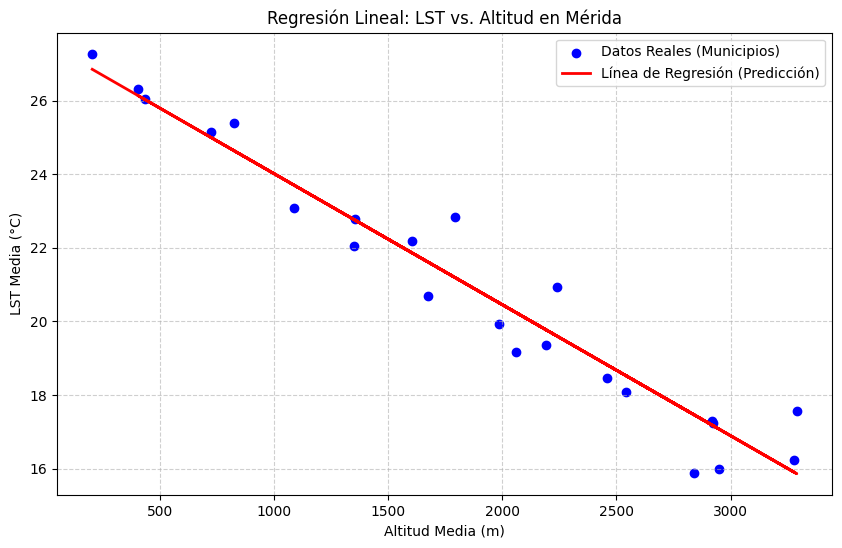


--- Interpretación de la Pendiente (Coeficiente) ---
Por cada metro (m) adicional de Altitud, la Temperatura (LST) desciende en 0.3563°C por cada 100m (100 * β1).

Ejemplo de Predicción: A una altitud de 2000m, la LST predicha es de 20.45°C.


In [31]:

## 💻 Celda: Regresión Lineal Simple: Altitud vs. LST (Predicción de Temperatura)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display

# --- 1. Definiciones y Carga de Datos ---
INPUT_CSV_PATH = '/content/drive/MyDrive/Datasets/datos_merida_consolidados.csv'

try:
    df = pd.read_csv(INPUT_CSV_PATH)

    # Definir variables (X = Altitud, Y = LST)
    X = df[['Altitud_m']].values  # Variable Predictora (X debe ser 2D)
    Y = df['LST_C'].values       # Variable Objetivo (Y)

    # Dividir datos (opcional, pero buena práctica)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # --- 2. Entrenar el Modelo de Regresión Lineal ---
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Obtener métricas
    r_squared = model.score(X_test, Y_test)

    print("✅ Modelo de Regresión Lineal Altitud (m) -> LST (°C) Entrenado.")
    print("-----------------------------------------------------------------")
    print(f"Coeficiente (Pendiente de la recta, β1): {model.coef_[0]:.4f}")
    print(f"Intercepto (Corte en el eje Y, β0): {model.intercept_:.4f}")
    print(f"R² del Modelo (Score en datos de prueba): {r_squared:.4f}")

    print("\nFórmula del Modelo:")
    print(f"LST (°C) = ({model.coef_[0]:.4f} * Altitud (m)) + {model.intercept_:.4f}")

    # --- 3. Visualización de la Regresión ---
    plt.figure(figsize=(10, 6))

    # Scatter plot de los datos reales (entrenamiento + prueba)
    plt.scatter(X, Y, color='blue', label='Datos Reales (Municipios)')

    # Línea de Regresión (predicción)
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Línea de Regresión (Predicción)')

    plt.title('Regresión Lineal: LST vs. Altitud en Mérida')
    plt.xlabel('Altitud Media (m)')
    plt.ylabel('LST Media (°C)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    print("\n--- Interpretación de la Pendiente (Coeficiente) ---")
    print(f"Por cada metro (m) adicional de Altitud, la Temperatura (LST) desciende en {abs(model.coef_[0]*100):.4f}°C por cada 100m (100 * β1).")

    # Ejemplo de predicción
    ejemplo_altitud = 2000 # metros
    prediccion = model.predict([[ejemplo_altitud]])[0]
    print(f"\nEjemplo de Predicción: A una altitud de {ejemplo_altitud}m, la LST predicha es de {prediccion:.2f}°C.")

except Exception as e:
    print(f"❌ Error al ejecutar la regresión lineal: {e}")